In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
input_file = "C:/Users/Sandy/Desktop/Geek_Lurn/Data_set/Decision_Tree/"

In [3]:
data = pd.read_csv(input_file+"madfhantr.csv")

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [8]:
data.shape

(480, 13)

In [7]:
# I selected few of the columns from the dataset for this tutorial
data = data[['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']]

data['Gender']=data['Gender'].replace(to_replace='Male',value='1')
data['Gender']=data['Gender'].replace(to_replace='Female',value='0')


data['Married']=data['Married'].replace(to_replace='Yes',value='1')
data['Married']=data['Married'].replace(to_replace='No',value='0')


data['Self_Employed']=data['Self_Employed'].replace(to_replace='No',value='0')
data['Self_Employed']=data['Self_Employed'].replace(to_replace='Yes',value='1')


data['Education']=data['Education'].replace(to_replace='Graduate',value='1')
data['Education']=data['Education'].replace(to_replace='Not Graduate',value='0')

data['Loan_Status']=data['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

In [10]:
data.Loan_Status.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [8]:
X = data.drop(columns=['Loan_Status'])
y = data.Loan_Status


In [9]:
data.columns 

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [12]:
clf.score(X_test,y_test)
#output = 0.7986111111111112


0.7986111111111112

In [13]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'


In [14]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['Gender','Married','Education','Self_Employed','Credit_History'],
                               class_names=['Yes','No'],filled=True,
                                rounded=True,  
                              special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("Gini")
graph


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [15]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['Gender','Married','Education','Self_Employed','Credit_History'],
                               class_names=['Yes','No'],filled=True,
                                rounded=True,  
                              special_characters=True) 


In [16]:
graph = graphviz.Source(dot_data)


In [17]:
graph.render("Gini")


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [18]:
from matplotlib import pyplot as plt

In [19]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 0
|--- feature_4 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



In [33]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [46]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

IndexError: list index out of range

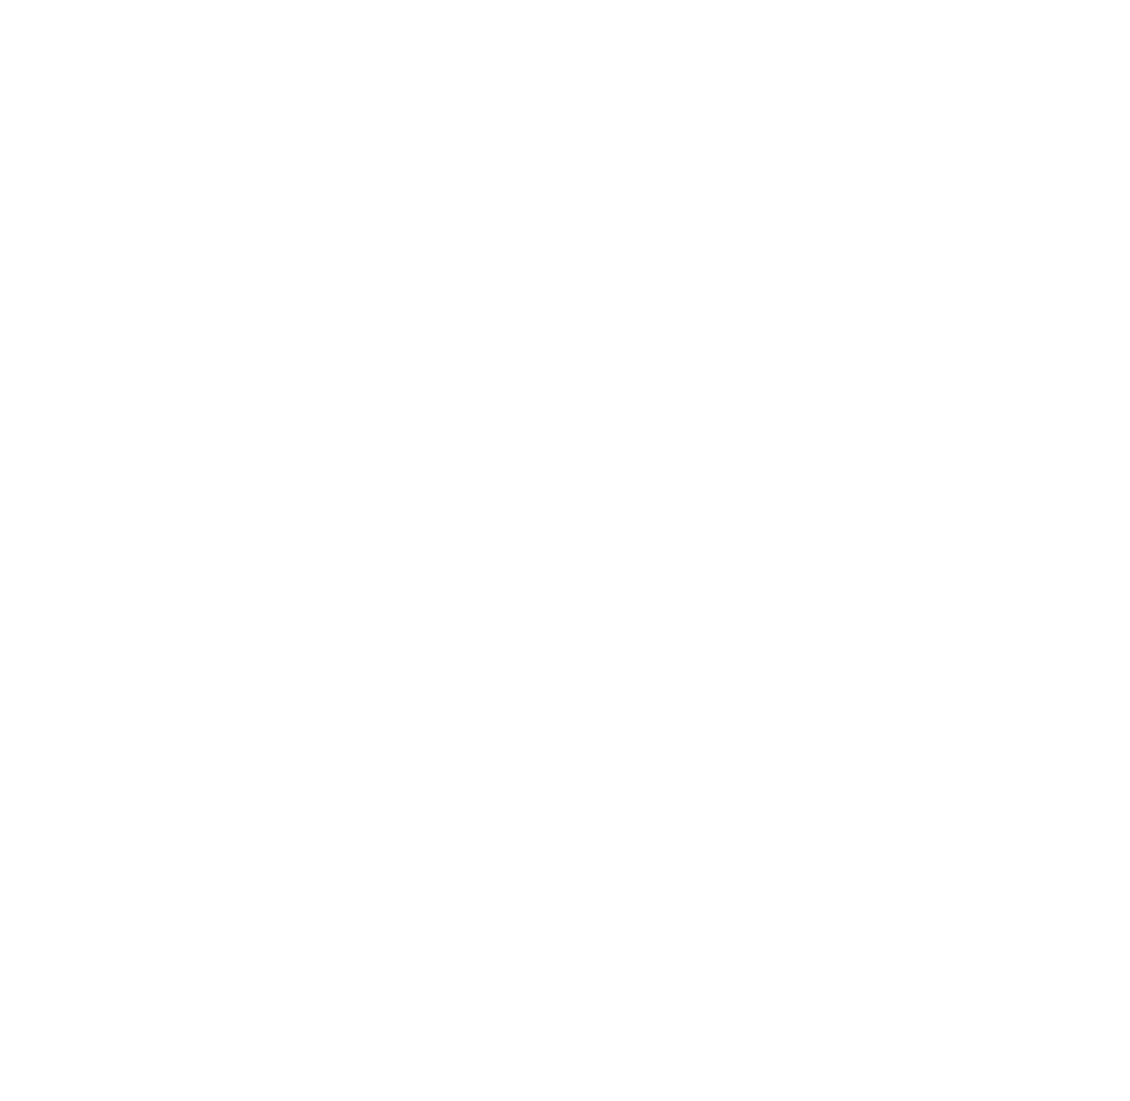

In [48]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
iris

TypeError: can only concatenate str (not "numpy.int64") to str

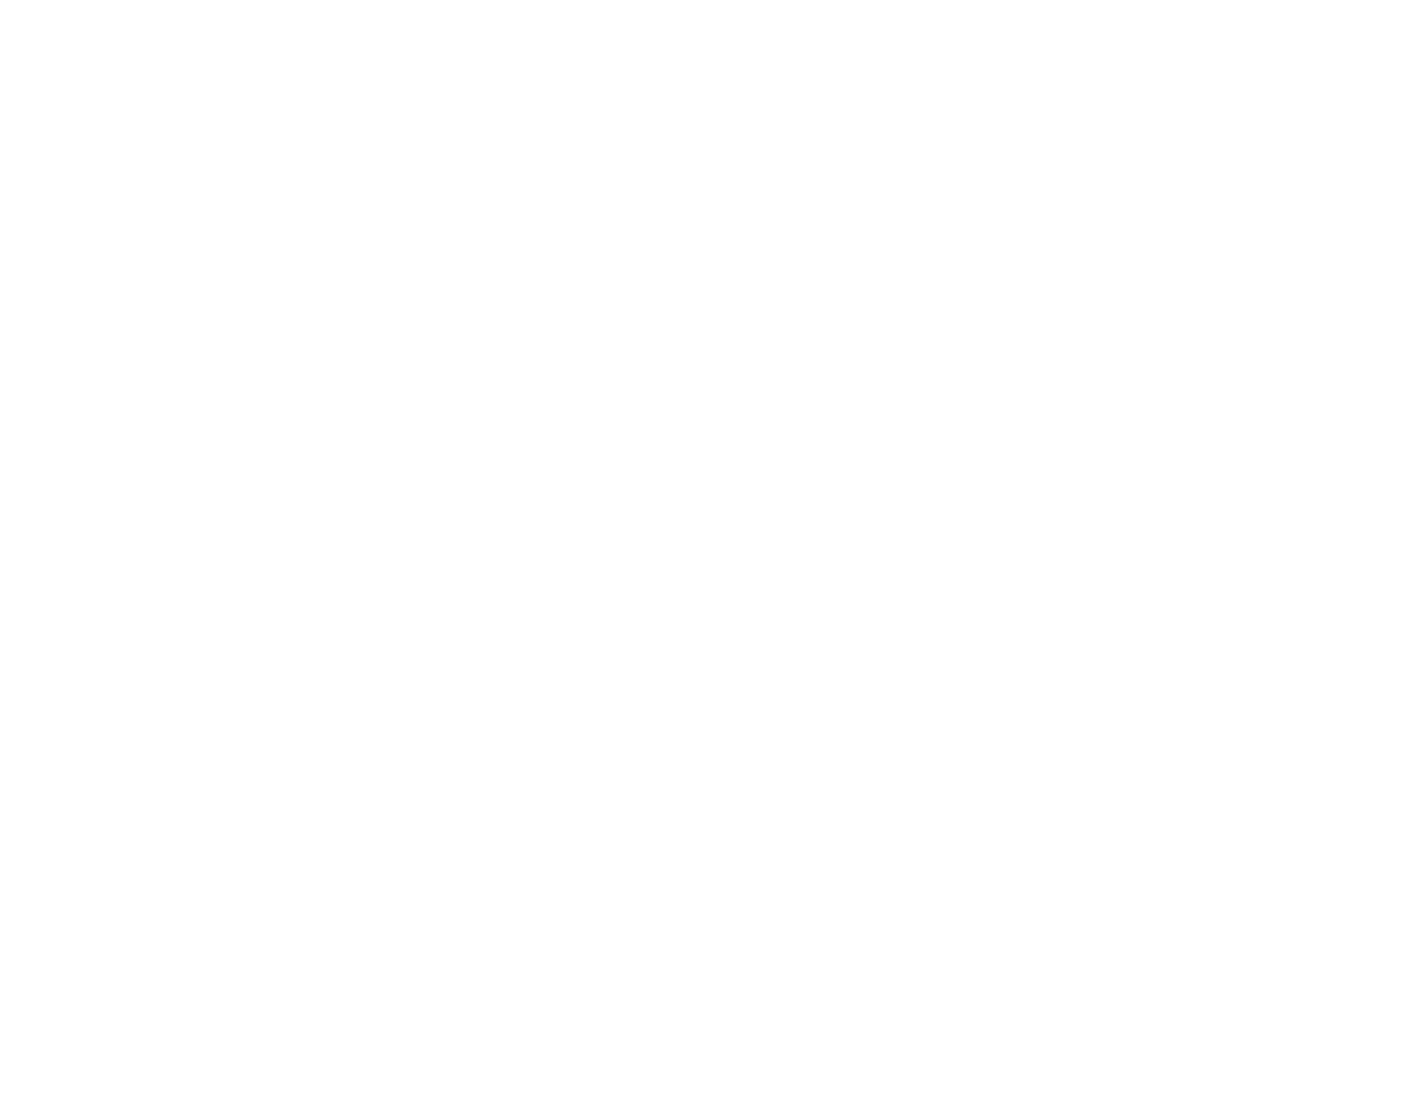

In [45]:
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=data['Loan_Status'],
                   filled=True)

### Random Forest

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


In [27]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=42)

In [28]:
y_pred_rf_test = classifier_rf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_pred_rf_test, y_test))

              precision    recall  f1-score   support

           0       0.34      1.00      0.51        15
           1       1.00      0.78      0.87       129

    accuracy                           0.80       144
   macro avg       0.67      0.89      0.69       144
weighted avg       0.93      0.80      0.84       144



In [32]:
y_pred_rf_train = classifier_rf.predict(X_train)

In [33]:
print(classification_report(y_pred_rf_train, y_train))

              precision    recall  f1-score   support

           0       0.46      0.87      0.60        55
           1       0.97      0.80      0.88       281

    accuracy                           0.81       336
   macro avg       0.72      0.84      0.74       336
weighted avg       0.89      0.81      0.83       336

